# Section 3 - Practical Aspects of Building Deep Learning Models

**Topics:**

* Feature engineering
* The notions of data batch and epoch	
    * Regularization
    * Network pruning
    * Dropout

# Notations for Regularization

Regularized objective function:

$ C = C_0 + \text{Penalty Term} $

where $C_0$ is the unregularized objective function

$L^2$ norm penalty term typically take the form of $ \frac{1}{2} ||w||^2_2 $

### Equation by equation

**Inputs to hidden layer 1**

$z_1(\mathbf{x}; \mathbf{w_1},b_1) = \sum_{j=1}^4 w_{1,j}^{(1)} x_j + b_1^{(1)}$


$z_2(\mathbf{x}; \mathbf{w_2},b_2) = \sum_{j=1}^4 w_{2,j}^{(1)} x_j + b_2^{(1)}$

$\vdots$

$z_6(\mathbf{x}; \mathbf{w_6},b_6) = \sum_{j=1}^4 w_{6,j}^{(1)} x_j + b_6^{(1)}$

where $j=1,2,3,4$ (in this example) is the index for the inputs

$h_k(\mathbf{x}; \mathbf{w_k},b_k) = g_1(z_k)$ where $k=1,2,\dots,6$ is the index for the hidden units


**Hidden layer 1 to output**

$y_1 = g_2 \left( \sum_{k=1}^6 w_{1,k}^{(2)} + b_1^{(2)} \right)$

$y_2 = g_2 \left( \sum_{k=1}^6 w_{2,k}^{(2)} + b_2^{(2)} \right)$

### Sequential layerwise architecture

First layer:
$$ \mathbf{h}^{(1)} = g^{(1)} \left(\mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}  \right) $$

Second layer:
$$ \mathbf{h}^{(2)} = g^{(2)} \left(\mathbf{W}^{(2)T} \mathbf{h}^{(1)} + \mathbf{b}^{(2)}  \right) $$



$\vdots$


$l^{th}$ layer:
$$ \mathbf{h}^{(l)} = g^{(l)} \left(\mathbf{W}^{(l)T} \mathbf{h}^{(l-1)} + \mathbf{b}^{(l)}  \right) $$



# Example

## Simulate and Visualize Data

The output is related to the input using the following function

$$y = 3x + x^2 exp(x) + \epsilon$$

where $\epsilon$ is an i.i.d. random variable

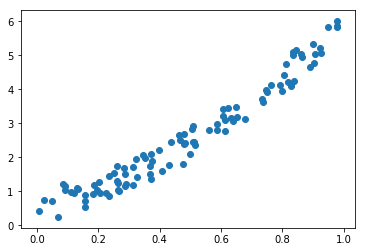

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = 3*x + np.power(x,2)*np.exp(x) + np.random.rand(100)

plt.scatter(x, y)
plt.show()

**Note: Before training, `numpy array` needs to be converted to `PyTorch's tensors`**

In [2]:
# convert numpy array to tensor in shape of input size
import torch 

x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()

In [3]:
print(x.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100, 1])


## Create a network

### Define a Feed-forward network with 2 hidden layers and dropout

In [4]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ffNet(nn.Module):
    def __init__(self):
        super(ffNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 16)
        self.linearlayer2 = torch.nn.Linear(16, 8)
        self.linearlayer2_drop = torch.nn.Dropout(p=0.2)
        self.linearlayer3 = torch.nn.Linear(8, 1)
        
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out1 = self.relu(self.linearlayer1(x))
        out2 = self.relu(self.linearlayer2_drop(self.linearlayer2(out1)))
        y_pred = self.linearlayer3(out2)
        return y_pred

ffnet = ffNet()
print(ffnet)

ffNet(
  (linearlayer1): Linear(in_features=1, out_features=16, bias=True)
  (linearlayer2): Linear(in_features=16, out_features=8, bias=True)
  (linearlayer2_drop): Dropout(p=0.2)
  (linearlayer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


### Define loss function and optimization algorithm

In [5]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(ffnet.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model Training

0


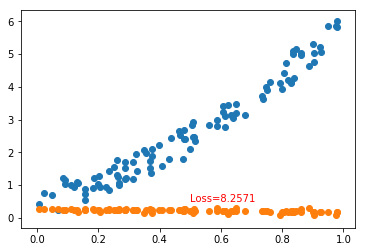

99


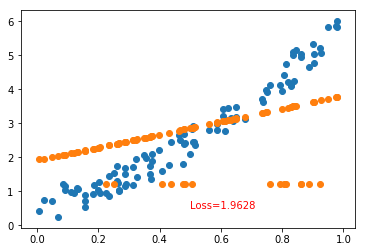

299


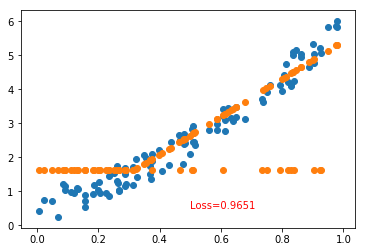

399


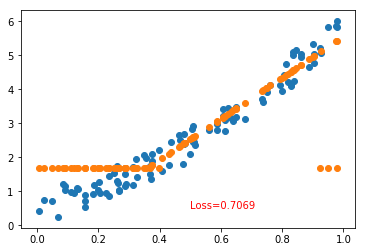

499


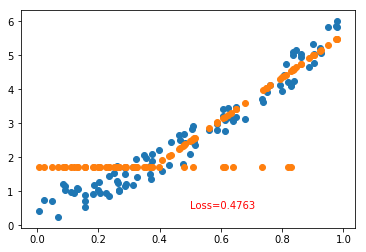

In [6]:
inputs  = Variable(x)
outputs = Variable(y)

for epoch in range(500):
    y_pred = ffnet(inputs)
    loss = loss_func(y_pred, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    if epoch in [0,99,299,399,499]:
        print(epoch)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r', lw=1)
        plt.scatter(x.data.numpy(), y_pred.data.numpy())
        plt.text(0.5, 0.5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

### Define a Feed-forward network with 2 hidden layers and weight decay

In [7]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ffNet(nn.Module):
    def __init__(self):
        super(ffNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 16)
        self.linearlayer2 = torch.nn.Linear(16, 8)
        self.linearlayer3 = torch.nn.Linear(8, 1)
        
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out1 = self.relu(self.linearlayer1(x))
        out2 = self.relu(self.linearlayer2(out1))
        y_pred = self.linearlayer3(out2)
        return y_pred

ffnet = ffNet()
print(ffnet)

ffNet(
  (linearlayer1): Linear(in_features=1, out_features=16, bias=True)
  (linearlayer2): Linear(in_features=16, out_features=8, bias=True)
  (linearlayer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


### Define loss function and optimization algorithm

In [10]:
# Define Optimizer and Loss Function
#optimizer = torch.optim.SGD(ffnet.parameters(), lr=0.01)
optimizer = torch.optim.Adam(ffnet.parameters(), lr=0.01, weight_decay=0.002)
loss_func = torch.nn.MSELoss()

### Model Training

0


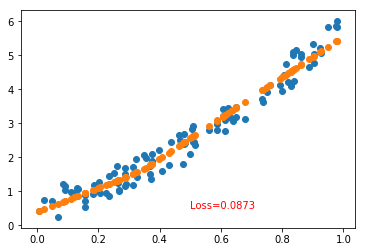

99


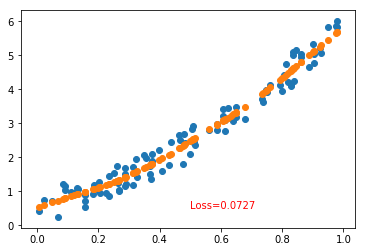

299


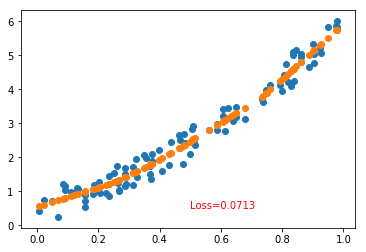

399


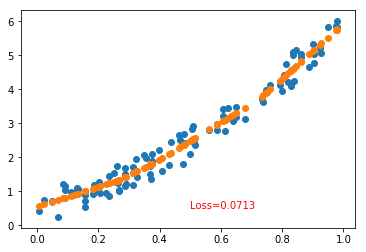

499


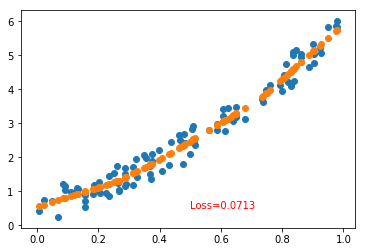

In [11]:
inputs  = Variable(x)
outputs = Variable(y)

for epoch in range(500):
    y_pred = ffnet(inputs)
    loss = loss_func(y_pred, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    if epoch in [0,99,299,399,499]:
        print(epoch)
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r', lw=1)
        plt.scatter(x.data.numpy(), y_pred.data.numpy())
        plt.text(0.5, 0.5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()